<a href="https://colab.research.google.com/github/dewshishir/new-practice/blob/main/class_12_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dewshishir/new-practice/0e83c44cd2b55a2e398c7308df76779cab737eaf/canvas-print-sunflower-natural-background-sunflower-blooming-close-up-i228134.jpg -O sunflower.jpg


--2025-11-01 08:52:00--  https://raw.githubusercontent.com/dewshishir/new-practice/0e83c44cd2b55a2e398c7308df76779cab737eaf/canvas-print-sunflower-natural-background-sunflower-blooming-close-up-i228134.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55886 (55K) [image/jpeg]
Saving to: ‘sunflower.jpg’

sunflower.jpg       100%[===================>]  54.58K  --.-KB/s    in 0.004s  

2025-11-01 08:52:01 (14.6 MB/s) - ‘sunflower.jpg’ saved [55886/55886]



In [3]:
img = cv2.imread('/content/sunflower.jpg')

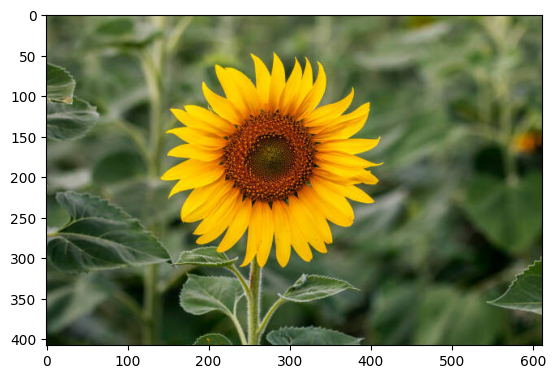

In [4]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

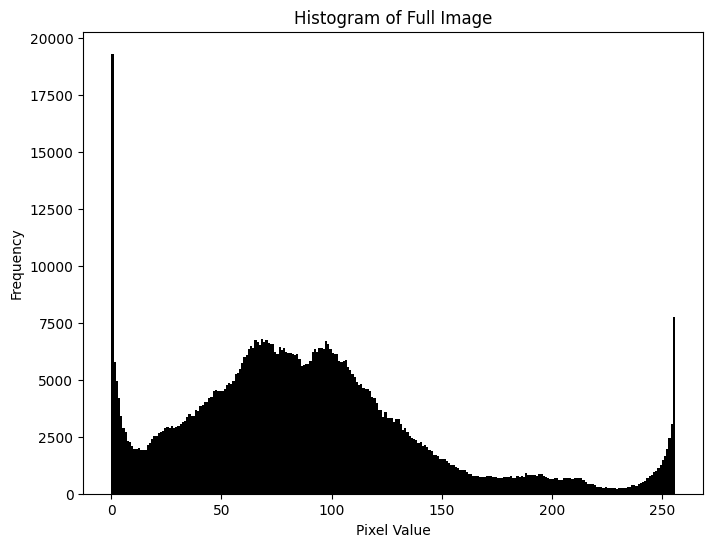

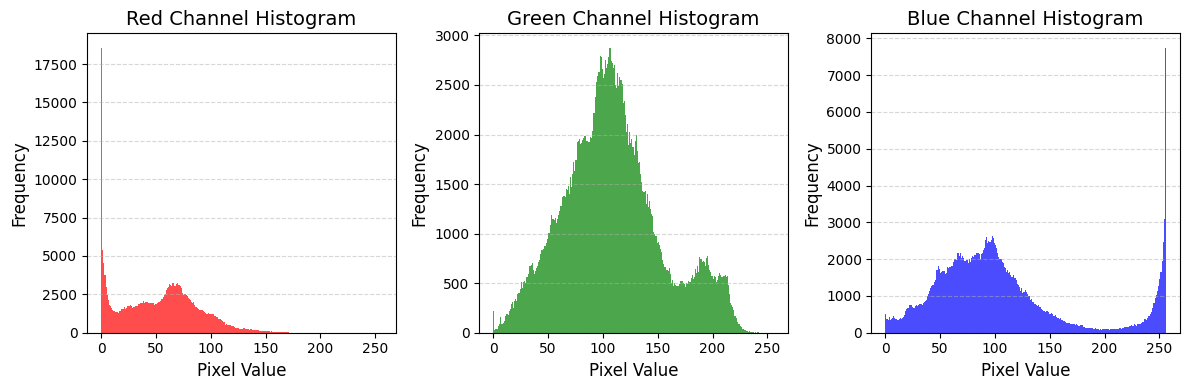

In [5]:
# Plot the histogram of the full image
plt.figure(figsize=(8, 6))
# flatten the image, plot histogram with black bars
plt.hist(img.ravel(), bins=256, range=(0, 256), color='k')
plt.title('Histogram of Full Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Plot the histograms of the individual color channels
plt.figure(figsize=(12, 4))
colors = ['r', 'g', 'b']
channels = ['Red', 'Green', 'Blue']

for i in range(3):  # Loop through channels
    plt.subplot(1, 3, i + 1)
    plt.hist(img[:, :, i].ravel(), bins=256, range=(0, 256), color=colors[i], alpha=0.7)
    plt.title(f'{channels[i]} Channel Histogram', fontsize=14)
    plt.xlabel('Pixel Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

age kisu ase

Histogram Equalization
```


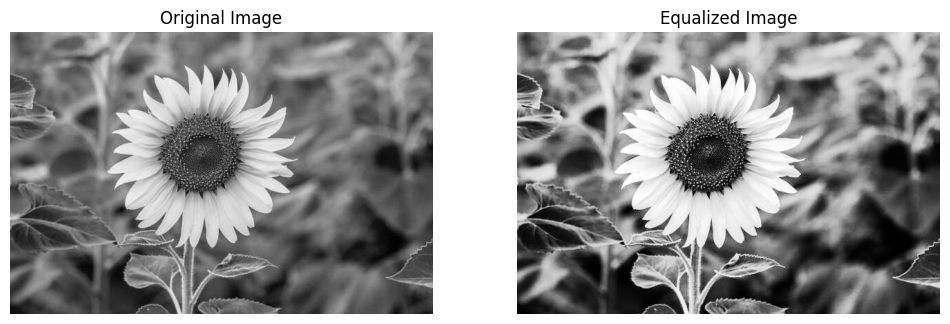

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(img_gray)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis("off")

plt.show()

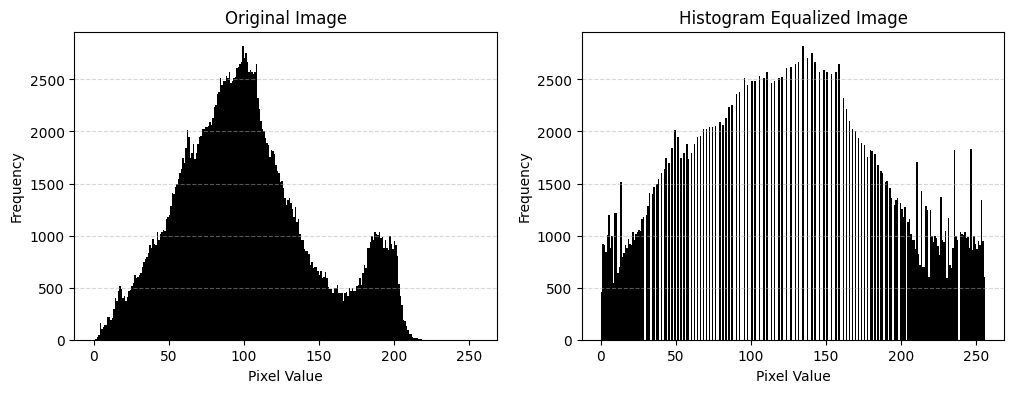

In [7]:
# histogram comparison of original and histogram equalized image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), bins=256, range=(0, 256), color='k')
plt.title('Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='k')
plt.title('Histogram Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [8]:
ahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
ahe_image = ahe.apply(img_gray)


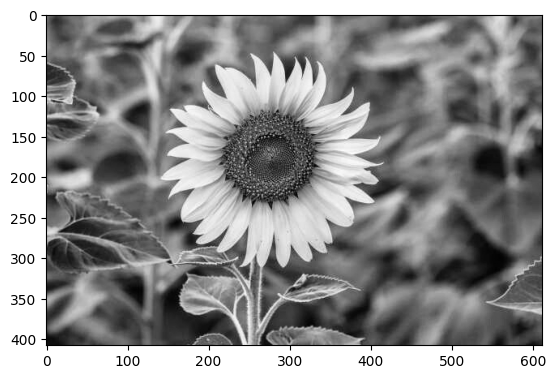

In [9]:
plt.imshow(ahe_image, cmap='gray')

CLAHE

In [10]:
# Apply Global Histogram Equalization (GHE)
ghe_image = cv2.equalizeHist(img_gray)

# Apply CLAHE
clahe1 = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
clahe1_img = clahe1.apply(img_gray)

clahe2 = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8, 8))
clahe2_img = clahe2.apply(img_gray)

# list of images and titles
images = [img_gray, ghe_image, clahe1_img, clahe2_img]
titles = [
    "Original Image",
    "Global Histogram Equalization (GHE)",
    "CLAHE 1",
    "CLAHE 2"
]

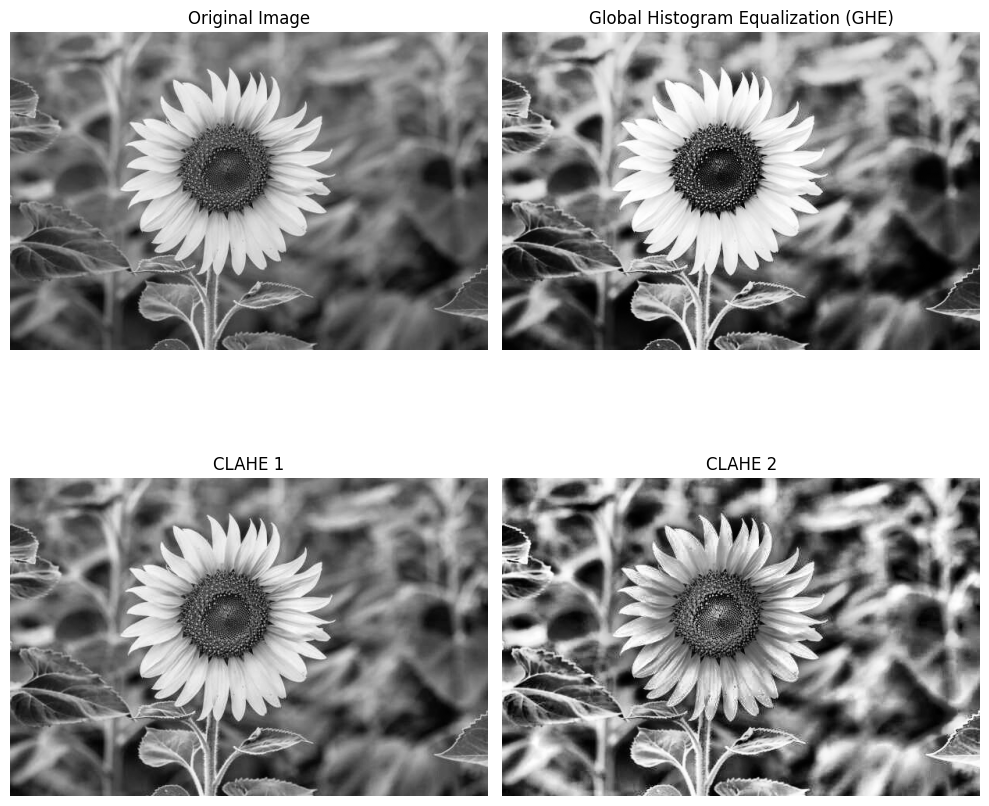

In [11]:
# Plotting the images
plt.figure(figsize=(10, 10))

for i in range(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()